In [1]:
%matplotlib notebook
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, cross_val_predict
from sklearn.svm import SVR,SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.dummy import DummyClassifier
from sklearn.preprocessing import LabelEncoder, MinMaxScaler
from sklearn.metrics import confusion_matrix, precision_score, recall_score, f1_score
from sklearn import datasets, linear_model, metrics
import _pickle as pickle
import math
import numpy as np
import h5py
import scipy
from PIL import Image
import pandas as pd
import tensorflow as tf
import tensorflow.python.keras.layers as tfl
from tensorflow.python.framework import ops
#from cnn_utils import *
#from test_utils import summary, comparator
from sklearn.preprocessing import StandardScaler
from tensorflow.python.keras.wrappers.scikit_learn import KerasRegressor
from sklearn.model_selection import cross_val_score
from sklearn.metrics import make_scorer
from tensorflow.keras import regularizers

In [3]:
!conda install -y tensorflow

Solving environment: \ 
The environment is inconsistent, please check the package plan carefully
The following packages are causing the inconsistency:

  - defaults/linux-64::mpfr==4.0.1=hdf1c602_3
  - defaults/linux-64::sympy==1.5.1=py36_0
  - defaults/linux-64::graphviz==2.40.1=h21bd128_2
  - defaults/linux-64::spyder==4.0.1=py36_0
  - defaults/linux-64::mkl_random==1.1.0=py36hd6b4f25_0
  - defaults/linux-64::matplotlib-base==3.1.3=py36hef1b27d_0
  - defaults/linux-64::notebook==6.0.3=py36_0
  - defaults/linux-64::patsy==0.5.1=py36_0
  - defaults/linux-64::blosc==1.16.3=hd408876_0
  - defaults/noarch::ipywidgets==7.5.1=py_0
  - conda-forge/linux-64::theano==1.0.3=py36hfc679d8_1
  - defaults/noarch::qtconsole==4.6.0=py_1
  - defaults/linux-64::pywavelets==1.1.1=py36h7b6447c_0
  - conda-forge/noarch::keras-applications==1.0.8=py_1
  - defaults/linux-64::dbus==1.13.12=h746ee38_0
  - defaults/linux-64::scipy==1.4.1=py36h0b6359f_0
  - defaults/linux-64::nb_conda==2.2.1=py36_0
  - defaults

In [2]:
tf.keras.backend.set_floatx('float64')
#%matplotlib widget
import matplotlib.pyplot as plt
import tensorflow.python.keras.backend as K

In [3]:
with open("dataa", "rb") as input_file:
   df = pickle.load(input_file)

In [4]:
df['CH2']=[np.nan]*len(df)
for i in range(len(df)):
    if df['CH2_SHELA'].iloc[i]!=-99 :
        if df['CH2_SPIES'].iloc[i]!=-99 :
            df['CH2'].iloc[i]=(df['CH2_SPIES'].iloc[i]+df['CH2_SHELA'].iloc[i])/2
        else :
            df['CH2'].iloc[i]=df['CH2_SHELA'].iloc[i]
    elif df['CH2_SPIES'].iloc[i]!=-99 :
        df['CH2'].iloc[i]=df['CH2_SPIES'].iloc[i]
df['CH1']=[np.nan]*len(df)
for i in range(len(df)):
    if df['CH1_SHELA'].iloc[i]!=-99 :
        if df['CH1_SPIES'].iloc[i]!=-99 :
            df['CH1'].iloc[i]=(df['CH1_SPIES'].iloc[i]+df['CH1_SHELA'].iloc[i])/2
        else :
            df['CH1'].iloc[i]=df['CH1_SHELA'].iloc[i]
    elif df['CH1_SPIES'].iloc[i]!=-99 :
        df['CH1'].iloc[i]=df['CH1_SPIES'].iloc[i]
    else :
        df['CH1'].iloc[i]=np.nan
dff=df[['K','G','CH1','W1','U','Z','J','W2','I','H','R','CH2','REDSHIFT','REDSHIFT_ERR','ZWARNING']].dropna()
dff[['K','G','CH1','W1','U','Z','J','W2','I','H','R','CH2','REDSHIFT']]=dff[['K','G','CH1','W1','U','Z','J','W2','I','H','R','CH2','REDSHIFT']].replace(-99,np.nan).dropna()
dff=dff.where(dff['REDSHIFT_ERR']<dff['REDSHIFT']*0.1).dropna()
X_data,y_data=dff[['K','G','CH1','W1','U','Z','J','W2','I','H','R','CH2']],dff['REDSHIFT']

/home/ec2-user/anaconda3/envs/tensorflow_p36/lib/python3.6/site-packages/pandas/core/indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value)


In [5]:
def Model2(l2=1e-2):
    model = tf.keras.Sequential([
        tfl.Dense(25,'tanh',input_shape=(12,),kernel_regularizer=regularizers.l2(l2)),
        tfl.Dense(25,'tanh',kernel_regularizer=regularizers.l2(l2)),
        tfl.Dense(1,'linear',kernel_regularizer=regularizers.l2(l2)),
        ])
    return model

In [6]:
inscaler = MinMaxScaler((-1,1))
ouscaler = MinMaxScaler()
Xs_data  = inscaler.fit_transform(X_data)
ys_data  = ouscaler.fit_transform(np.array(y_data).reshape(-1,1))

In [7]:
def plot_his(history,n='n'):
    if n=='n':
        N=len(history)
        hisloss=np.sum([history[i].history['loss'] for i in range(N)],axis=0)/N
        hisval=np.sum([history[i].history['val_loss'] for i in range(N)],axis=0)/N
    else :
        hisloss=history[n].history['loss']
        hisval=history[n].history['val_loss']
    plt.figure()
    plt.plot(hisloss)
    plt.plot(hisval)
    plt.title('model loss')
    plt.ylabel('loss')
    plt.xlabel('epoch')
    plt.legend(['train', 'test'], loc='upper left')

In [ ]:
'''import zipfile as zf
files = zf.ZipFile("model_1_8_10.zip", 'r')
files.extractall()
files.close()'''

In [12]:
infile = open('0.001_9_10.pkl','rb')
hisloss,hisval = pickle.load(infile)
infile.close()

In [9]:
def plot_h(hisloss,hisval):
    plt.figure()
    plt.plot(hisloss)
    plt.plot(hisval)
    plt.title('model loss')
    plt.ylabel('loss')
    plt.xlabel('epoch')
    plt.legend(['train', 'test'], loc='upper left')

<IPython.core.display.Javascript object>


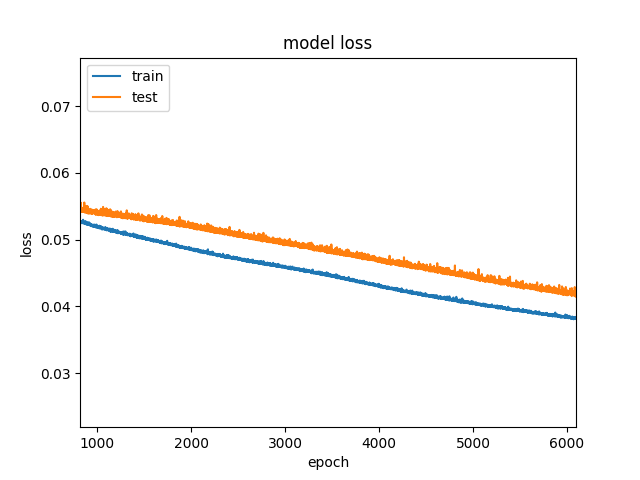

In [10]:
plot_h(hisloss,hisval)

<IPython.core.display.Javascript object>


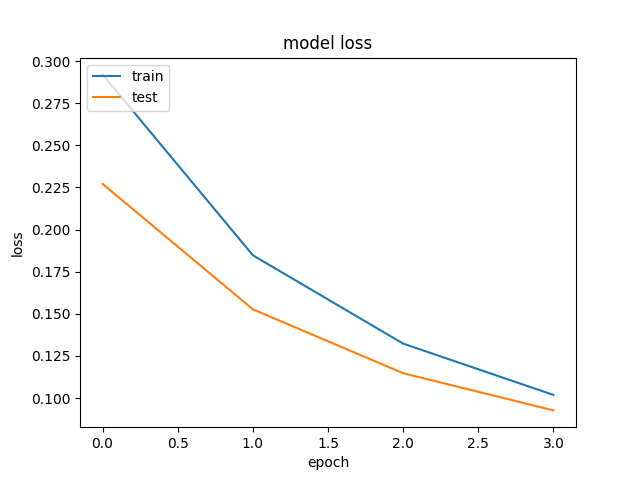

<IPython.core.display.Javascript object>


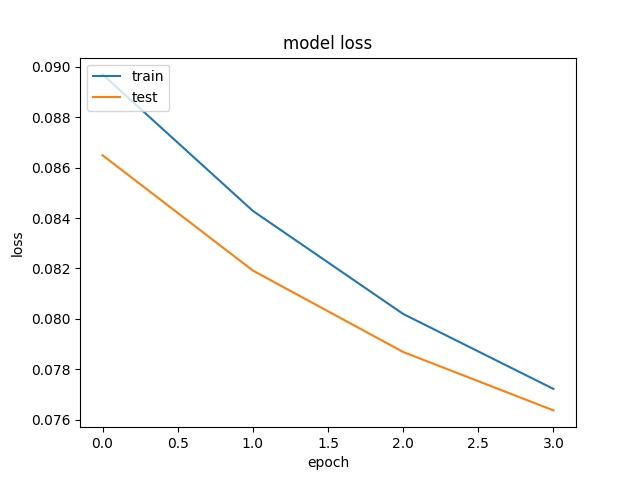

<IPython.core.display.Javascript object>


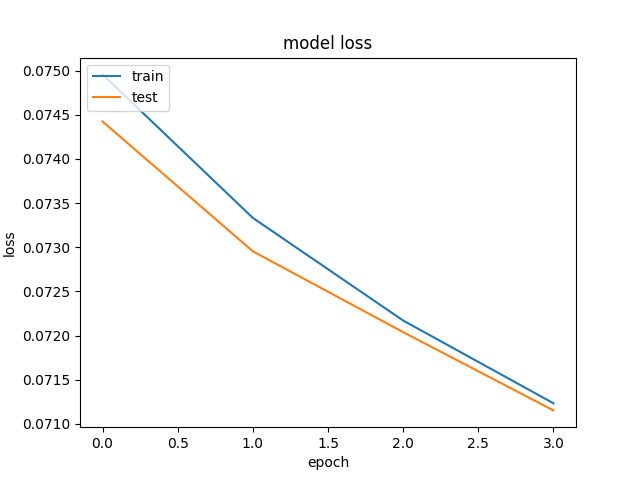

<IPython.core.display.Javascript object>


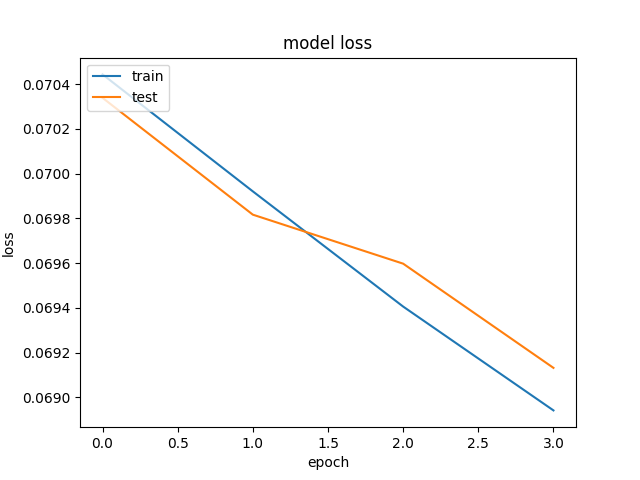

In [13]:
for i in range(4):
    plot_h(hisloss[4*i:4*i+4],hisval[4*i:4*i+4])

In [15]:
hisloss[0]

0.2920807602524522

In [ ]:
!conda install -c conda-forge -y npm

In [ ]:
!conda update -y tornado